In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,839 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# 통계분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest #비율검정

from scipy.stats import shapiro # 샤피로=윌크 검정
from scipy.stats import chi2_contingency #카이제곱검정
from statsmodels.stats.anova import anova_lm # ANOVA


#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#font
matplotlib.rc('axes',unicode_minus=False)
plt.rc('font',family='NanumGothic')
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("font",family="NanumGothic")
plt.rc('font', family='NanumBarunGothic') 

#ols : 최소자승법
from statsmodels.formula.api import ols
#선형모델 formula (y~ X1+X2 ...)
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
import statsmodels.api as sm
# 여기서는 정규성과 등분산, 독립성을 그래프로 판단함

#모델평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score,r2_score
from sklearn.metrics import confusion_matrix, classification_report
#로지스틱 회귀
from statsmodels.api import Logit

#rmse(없어서 다시 만듦)
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

#sklearn.tree+export_graphviz
from sklearn.tree import export_graphviz
import graphviz

#Over sampling

from imblearn.over_sampling import SMOTE
#grid search
from sklearn.model_selection import GridSearchCV
#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
book_lead=pd.read_csv("/content/drive/MyDrive/Booking_data_version5.csv")
book_lead=book_lead.iloc[:,1:]
book_lead

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015
1,A,2015-12-14,443,SI0298,16D01021,NaN,100,5400.00,540000.0,0,Y,2015-12-15,1.0,2015.0,2015
2,B4,2015-12-14,2,IJ9455,1S101004,NaN,922,5200.00,567273.0,56727,Y,2015-12-14,0.0,2015.0,2015
3,A,2015-12-14,451,SI0346,1BA04019,NaN,40,310.00,45091.0,4509,Y,2015-12-15,1.0,2015.0,2015
4,A,2015-12-14,452,SI0346,1BA04001,NaN,18,1550.00,22546.0,2254,Y,2015-12-15,1.0,2015.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343245,A,2021-11-02,150,IJ9548,16B06095,NaN,256,7723.00,561673.0,56167,Y,2021-11-03,1.0,2021.0,2021
1343246,B4,2021-11-04,1,IA1406,13A00748,NaN,200,9800.00,1960000.0,196000,Y,2021-11-05,1.0,2021.0,2021
1343247,B4,2021-11-04,2,IA1406,18A03045,NaN,30,8400.00,252000.0,25200,Y,2021-11-05,1.0,2021.0,2021
1343248,C,2021-10-30,113,IJ9780,16A03015,NaN,1,4405.76,4406.0,0,Y,2021-10-31,1.0,2021.0,2021


In [ ]:
book_lead.isna().sum()

수주사업장              0
수주일자               0
수주일련번호             0
거래처코드              0
수주품목코드             0
출고수량KG       1343239
수주수량KG             0
수주단가               0
수주금액               0
부가세금액              0
출하완료여부             0
납기일자              35
Lead time         35
Year1             35
Year2              0
dtype: int64

In [ ]:
book_v2=pd.read_csv("/content/drive/MyDrive/Booking_data_version2.csv",encoding = 'utf - 8')

book_v2=book_v2.iloc[:,1:]

# 1.출하완료여부랑 수주수량 
ex)출하가 N인경우의 수주수량     
출하가 Y인경우의 수주수량-->특정 숫자이상의 수주수량이라면 출하가 안된다.  
	-->특정수주수량의 수주를 받으면 안된다라는 인사이트

In [ ]:
book_n=book_v2[book_v2['출하완료여부']=='N']
book_n

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자
311,C,20200521,239,IK0967,NaN,18A03029,0,83,6000.0,1080000.0,108000,N,20200522
873,C,20200522,86,IJ1739,400,13R08022,586,586,2151.0,3938481.0,393848,N,20200523
752536,C,20200525,286,IA1406,400,1BA03443,1236,1344,1570.0,5275200.0,527520,N,20200526
759019,C,20210405,291,IJ9543,400,1BA03023,636,720,2600.0,1872000.0,187200,N,20210406
765097,C,20201115,140,IK2137,202,16A01092,90,90,5990.0,539100.0,53910,N,20201115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653814,A,20211102,149,IJ9548,sc600,1BA03681,0,38,1485.0,168750.0,16875,N,20211103
1653815,A,20211102,150,IJ9548,sc600,16B06095,0,256,7723.0,561673.0,56167,N,20211103
1653816,B4,20211104,1,IA1406,400,13A00748,0,200,9800.0,1960000.0,196000,N,20211105
1653817,B4,20211104,2,IA1406,400,18A03045,0,30,8400.0,252000.0,25200,N,20211105


# 소스별 , 밥류별 수주 EDA

## 가장 많은 생산을 차지하는 소스의 출하여부가 잘 지켜지고 있는지 확인

In [ ]:
# product name과 merge
p_name=pd.read_csv("/content/drive/MyDrive/Product_Name.csv")
p_name

,품목코드,품목명,평균수주단가,Column 4
0,NaN,NaN,NaN,NaN
1,1.#JE+00,가쓰오다시국물900ml,NaN,NaN
2,11501122,조미액-갈릭라이스3kg,NaN,NaN
3,11501131,조미유-쉐프솔루션베이스볶음밥(시즌),NaN,NaN
4,11501133,조미액-소불고기볶음밥-JB/이랜드,NaN,NaN
...,...,...,...,...
2831,2BA03596,갈릭시즐링라이스 3kg(재),NaN,NaN
2832,2BA04003,카모메냉동우동면8각/반개면(재),NaN,NaN
2833,2C301013,고소쌈장(튜브)(재),NaN,NaN
2834,2D001002,모노치즈허니월넛크림치즈(재),NaN,NaN


In [ ]:
p_name=p_name.loc[:,'품목코드':'품목명']

p_name=p_name.dropna()
p_name

,품목코드,품목명
1,1.#JE+00,가쓰오다시국물900ml
2,11501122,조미액-갈릭라이스3kg
3,11501131,조미유-쉐프솔루션베이스볶음밥(시즌)
4,11501133,조미액-소불고기볶음밥-JB/이랜드
5,11501135,한식베이스소스2kg
...,...,...
2831,2BA03596,갈릭시즐링라이스 3kg(재)
2832,2BA04003,카모메냉동우동면8각/반개면(재)
2833,2C301013,고소쌈장(튜브)(재)
2834,2D001002,모노치즈허니월넛크림치즈(재)


In [ ]:
p_name.rename(columns={'품목코드':'수주품목코드'},inplace=True)
p_name

,수주품목코드,품목명
1,1.#JE+00,가쓰오다시국물900ml
2,11501122,조미액-갈릭라이스3kg
3,11501131,조미유-쉐프솔루션베이스볶음밥(시즌)
4,11501133,조미액-소불고기볶음밥-JB/이랜드
5,11501135,한식베이스소스2kg
...,...,...
2831,2BA03596,갈릭시즐링라이스 3kg(재)
2832,2BA04003,카모메냉동우동면8각/반개면(재)
2833,2C301013,고소쌈장(튜브)(재)
2834,2D001002,모노치즈허니월넛크림치즈(재)


In [ ]:
book_v2_merge_name=book_v2.merge(p_name,on='수주품목코드')
book_v2_merge_name

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,품목명
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.0,16500.0,1650,Y,20151215,시아스고구마샐러드S
1,C,20151214,163,IJ9455,400,16A01039,525,525,2745.0,1441125.0,144113,Y,20151215,시아스고구마샐러드S
2,A,20161019,7,IJ1693,sc600,16A01039,30,30,3513.0,95810.0,9580,Y,20161020,시아스고구마샐러드S
3,C,20151215,61,IJ9455,400,16A01039,170,170,2745.0,466650.0,46665,Y,20151216,시아스고구마샐러드S
4,A,20151215,144,IJ9449,sc600,16A01039,50,50,3520.0,160000.0,16000,Y,20151216,시아스고구마샐러드S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092788,A,20211101,195,SI0106,NaN,1BA03681,38,38,1300.0,147728.0,14772,Y,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092789,A,20211101,211,SI0107,NaN,1BA03681,15,15,1230.0,55910.0,5590,Y,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092790,C,20211102,196,IJ9455,202,1BA03681,0,83,1050.0,288750.0,28875,N,20211102,(1)NEW새우볶음밥300g(칼로스쌀)
1092791,A,20211102,138,IJ9449,NaN,1BA03681,0,23,1390.0,94773.0,9477,N,20211103,(1)NEW새우볶음밥300g(칼로스쌀)


# 제품군 범주화

In [ ]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
book_v2_merge_name['구분'] = book_v2_merge_name['품목명'].apply(func1)

In [ ]:
book_v2_merge_name['출하완료여부'] = book_v2_merge_name['출하완료여부'].replace('N', 1).replace('Y', 0)

In [ ]:
book_v2_merge_name

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,품목명,구분
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.0,16500.0,1650,0,20151215,시아스고구마샐러드S,salad
1,C,20151214,163,IJ9455,400,16A01039,525,525,2745.0,1441125.0,144113,0,20151215,시아스고구마샐러드S,salad
2,A,20161019,7,IJ1693,sc600,16A01039,30,30,3513.0,95810.0,9580,0,20161020,시아스고구마샐러드S,salad
3,C,20151215,61,IJ9455,400,16A01039,170,170,2745.0,466650.0,46665,0,20151216,시아스고구마샐러드S,salad
4,A,20151215,144,IJ9449,sc600,16A01039,50,50,3520.0,160000.0,16000,0,20151216,시아스고구마샐러드S,salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092788,A,20211101,195,SI0106,NaN,1BA03681,38,38,1300.0,147728.0,14772,0,20211102,(1)NEW새우볶음밥300g(칼로스쌀),rice
1092789,A,20211101,211,SI0107,NaN,1BA03681,15,15,1230.0,55910.0,5590,0,20211102,(1)NEW새우볶음밥300g(칼로스쌀),rice
1092790,C,20211102,196,IJ9455,202,1BA03681,0,83,1050.0,288750.0,28875,1,20211102,(1)NEW새우볶음밥300g(칼로스쌀),rice
1092791,A,20211102,138,IJ9449,NaN,1BA03681,0,23,1390.0,94773.0,9477,1,20211103,(1)NEW새우볶음밥300g(칼로스쌀),rice


In [ ]:
#전체 출하 건수
len_p1=book_v2_merge_name.groupby('구분')['구분'].count()
len_p1=pd.DataFrame(len_p1)
len_p1.rename(columns={'구분':'개수'},inplace=True)
len_p1.reset_index(inplace=True)
len_p1

,구분,개수
0,drink,897
1,rice,127389
2,salad,168386
3,sauce,753574
4,soup,30942


In [ ]:
#출하실패개수 : p1의 출하완료여부 변수
p1 = book_v2_merge_name.pivot_table(index='구분', values= '출하완료여부', aggfunc='sum').reset_index()
p1['출하완료여부N비율'] = p1['출하완료여부'] / len_p1['개수']
p1

,구분,출하완료여부,출하완료여부N비율
0,drink,1,0.001115
1,rice,387,0.003038
2,salad,395,0.002346
3,sauce,1947,0.002584
4,soup,138,0.004460


In [ ]:
sum_all = sum(p1['출하완료여부'])
p1['비율_전체출하실패개수'] = p1['출하완료여부'] / sum_all
p1 #전체 출하실패 건수 중에서 source 가 가장 출하실패비율을 많이 차지!

,구분,출하완료여부,출하완료여부N비율,비율_전체출하실패개수
0,drink,1,0.001115,0.000349
1,rice,387,0.003038,0.134937
2,salad,395,0.002346,0.137727
3,sauce,1947,0.002584,0.678870
4,soup,138,0.004460,0.048117


# 소스의 리드타임분석--> 대실패!

In [ ]:
book_lead_merge_name=book_lead.merge(p_name,on='수주품목코드')
book_lead_merge_name

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S
1,C,2015-12-14,163,IJ9455,16A01039,NaN,525,2745.00,1441125.0,144113,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S
2,A,2016-10-19,7,IJ1693,16A01039,NaN,30,3513.00,95810.0,9580,Y,2016-10-20,1.0,2016.0,2016,시아스고구마샐러드S
3,C,2015-12-15,61,IJ9455,16A01039,NaN,170,2745.00,466650.0,46665,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S
4,A,2015-12-15,144,IJ9449,16A01039,NaN,50,3520.00,160000.0,16000,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915158,C,2021-11-02,196,IJ9455,1BA03681,NaN,83,1050.00,288750.0,28875,Y,2021-11-02,0.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀)
915159,A,2021-11-02,138,IJ9449,1BA03681,NaN,23,1390.00,94773.0,9477,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀)
915160,A,2021-11-02,149,IJ9548,1BA03681,NaN,38,1485.00,168750.0,16875,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀)
915161,C,2021-10-30,98,IJ9399,1BA10086,NaN,1,4766.39,4766.0,0,Y,2021-10-31,1.0,2021.0,2021,(1)Homeplus signature날치알이톡톡터지는날치알밥(밥+후리가


In [ ]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
book_lead_merge_name['구분'] = book_v2_merge_name['품목명'].apply(func1)

In [ ]:
book_lead_merge_name

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명,구분
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
1,C,2015-12-14,163,IJ9455,16A01039,NaN,525,2745.00,1441125.0,144113,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
2,A,2016-10-19,7,IJ1693,16A01039,NaN,30,3513.00,95810.0,9580,Y,2016-10-20,1.0,2016.0,2016,시아스고구마샐러드S,salad
3,C,2015-12-15,61,IJ9455,16A01039,NaN,170,2745.00,466650.0,46665,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
4,A,2015-12-15,144,IJ9449,16A01039,NaN,50,3520.00,160000.0,16000,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915158,C,2021-11-02,196,IJ9455,1BA03681,NaN,83,1050.00,288750.0,28875,Y,2021-11-02,0.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915159,A,2021-11-02,138,IJ9449,1BA03681,NaN,23,1390.00,94773.0,9477,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915160,A,2021-11-02,149,IJ9548,1BA03681,NaN,38,1485.00,168750.0,16875,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915161,C,2021-10-30,98,IJ9399,1BA10086,NaN,1,4766.39,4766.0,0,Y,2021-10-31,1.0,2021.0,2021,(1)Homeplus signature날치알이톡톡터지는날치알밥(밥+후리가,sauce


# 수주사업장별 출하완료여부

In [ ]:
book_v2

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자
0,A,20151214,441,SI0298,sc600,16A01039,5,5,3630.00,16500.0,1650,Y,20151215
1,A,20151214,443,SI0298,sc600,16D01021,100,100,5400.00,540000.0,0,Y,20151215
2,B4,20151214,2,IJ9455,400,1S101004,922,922,5200.00,567273.0,56727,Y,20151214
3,A,20151214,451,SI0346,sc600,1BA04019,40,40,310.00,45091.0,4509,Y,20151215
4,A,20151214,452,SI0346,sc600,1BA04001,18,18,1550.00,22546.0,2254,Y,20151215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653815,A,20211102,150,IJ9548,sc600,16B06095,0,256,7723.00,561673.0,56167,N,20211103
1653816,B4,20211104,1,IA1406,400,13A00748,0,200,9800.00,1960000.0,196000,N,20211105
1653817,B4,20211104,2,IA1406,400,18A03045,0,30,8400.00,252000.0,25200,N,20211105
1653818,C,20211030,113,IJ9780,400,16A03015,0,1,4405.76,4406.0,0,Y,20211031


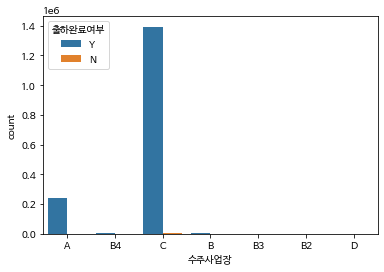

In [ ]:
ax=sns.countplot(x='수주사업장',hue='출하완료여부',data=book_v2)

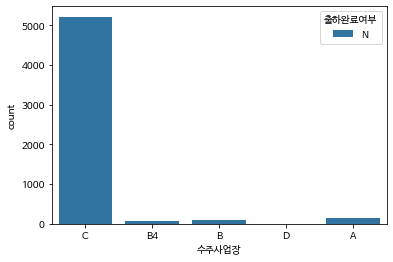

In [ ]:
ax=sns.countplot(x='수주사업장',hue='출하완료여부',data=book_n)

### 홍민: 리드타임과 출하완료여부는 ->수주사업장이 가장 큰 영향인자다.


리드타임 상한선 : 30
전체 출하 데이터에서 리드타임이 가장 큰 품목을 찾아서 그 품목을 제어

In [ ]:
book_lead_month=book_lead_merge_name[book_lead_merge_name['Lead time']<31]

# 각 품목명별 평균리드타임 sort

In [ ]:
book_lead_month_group_name=book_lead_month.groupby('품목명')['Lead time'].mean()
book_lead_month_group_name=pd.DataFrame(book_lead_month_group_name).reset_index()
book_lead_month_group_name.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_name

,품목명,Lead time
96,G-price마요네즈500g,29.000000
994,쿠마이쉬림프후라이드라이스2kg,22.200000
300,디프라이스마요네즈-1 1kg,22.076923
995,쿠마이악토퍼스후라이드라이스2kg,21.750000
301,디프라이스마요네즈500g,21.500000
...,...,...
276,닭강정소스T,0.000000
38,(연결링)(20년)아몬드&호두드레싱-N495g*2ea,0.000000
894,정성담은토마토케찹595g (1),0.000000
341,마요네즈1kg튜브(니혼푸드),0.000000


In [ ]:
book_lead_merge_name[book_lead_merge_name['품목명']=='G-price마요네즈500g']

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명,구분
868146,C,2012-03-07,34,IJ9205,16B06068,NaN,20500,1400.0,57400000.0,0,Y,2012-05-25,79.0,2012.0,2012,G-price마요네즈500g,sauce
868147,C,2012-03-07,257,IJ9205,16B06068,NaN,20500,1400.0,57400000.0,0,Y,2012-06-22,107.0,2012.0,2012,G-price마요네즈500g,sauce
868148,C,2012-11-22,44,IJ9205,16B06068,NaN,20500,2800.0,57400000.0,0,Y,2012-12-21,29.0,2012.0,2012,G-price마요네즈500g,sauce


## 드링크의 리드타임이 가장 길다

#수주 사업장별 평균리드타임


In [ ]:
book_lead_month_group_work=book_lead_month.groupby('수주사업장')['Lead time'].mean()
book_lead_month_group_work=pd.DataFrame(book_lead_month_group_work).reset_index()
book_lead_month_group_work.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_work

,수주사업장,Lead time
3,C,1.515963
2,B4,1.421053
0,A,1.127071
1,B3,1.000000
4,D,1.000000


## 품목명(코드)별 평균리드타임, 수주수량 scatter 

In [ ]:
book_lead_month_group_code=book_lead_month.groupby('수주품목코드')['Lead time'].mean()
book_lead_month_group_code=pd.DataFrame(book_lead_month_group_code).reset_index()
book_lead_month_group_code.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_code

,수주품목코드,Lead time
767,16B06068,29.000000
823,1BA03025,22.200000
755,16B06028,22.076923
824,1BA03026,21.750000
763,16B06058,21.500000
...,...,...
410,13G02073,0.000000
1110,1BA03627,0.000000
593,13R13033,0.000000
1089,1BA03563,0.000000


In [ ]:

book_lead_month_group_code[book_lead_month_group_code['수주품목코드']=='16A01062']


,수주품목코드,Lead time
678,16A01062,1.017018


In [ ]:
book_lead[book_lead['수주품목코드']=='16A01062']

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2
306,A,2020-05-21,122,SI0125,16A01062,NaN,50,3700.0,168182.0,16818,Y,2020-05-22,1.0,2020.0,2020
324,C,2020-05-21,273,IJ9455,16A01062,NaN,300,2745.0,823500.0,82350,Y,2020-05-22,1.0,2020.0,2020
528,A,2020-05-22,5,IJ9433,16A01062,NaN,50,3800.0,172728.0,17272,Y,2020-05-25,3.0,2020.0,2020
676,A,2020-03-10,80,IJ9532,16A01062,NaN,10,3850.0,35000.0,3500,Y,2020-03-11,1.0,2020.0,2020
868,A,2020-05-22,33,SI3114,16A01062,NaN,110,3500.0,350000.0,35000,Y,2020-05-23,1.0,2020.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343089,C,2021-11-02,59,IJ9454,16A01062,NaN,50,3300.0,165000.0,16500,Y,2021-11-02,0.0,2021.0,2021
1343102,C,2021-11-02,72,IK0146,16A01062,NaN,225,3300.0,742500.0,74250,Y,2021-11-02,0.0,2021.0,2021
1343207,A,2021-11-02,119,IJ9433,16A01062,NaN,50,3800.0,172728.0,17272,Y,2021-11-03,1.0,2021.0,2021
1343225,A,2021-11-02,136,SI0125,16A01062,NaN,10,3960.0,36000.0,3600,Y,2021-11-03,1.0,2021.0,2021


In [ ]:
# #전체 book_lead 기준
# book_lead_xx=book_lead[book_lead['Lead time']<31]

# book_lead_month_group_code=book_lead_xx.groupby('수주품목코드')['Lead time'].mean()
# book_lead_month_group_code=pd.DataFrame(book_lead_month_group_code).reset_index()
# book_lead_month_group_code.sort_values(by=['Lead time'],ascending=False,inplace=True)
# book_lead_month_group_code

,수주품목코드,Lead time
211,13A00660,30.0
2572,16B06068,29.0
4272,57102069,23.0
4273,57102070,23.0
3306,1BA04043,23.0
...,...,...
2612,16B06117,0.0
3642,1C401001,0.0
3866,54300015,0.0
1224,13F00102,0.0


In [ ]:
book_lead_month_group_code_top=book_lead_month_group_code[book_lead_month_group_code['Lead time']>5]
book_lead_month_group_code_top
book_lead_month_group_code_top_code=book_lead_month_group_code_top['수주품목코드']
book_lead_month_group_code_top_code

767    16B06068
823    1BA03025
755    16B06028
824    1BA03026
763    16B06058
         ...   
168    13B00059
759    16B06043
165    13B00050
528    13R05025
169    13B00064
Name: 수주품목코드, Length: 224, dtype: object

## 각 품목별 평균 수주 수량KG

In [ ]:
book_lead_month_group_kg=book_lead_month.groupby('수주품목코드')['수주수량KG'].mean()
book_lead_month_group_kg=pd.DataFrame(book_lead_month_group_kg).reset_index()
book_lead_month_group_kg.sort_values(by=['수주수량KG'],ascending=False,inplace=True)
book_lead_month_group_kg

,수주품목코드,수주수량KG
767,16B06068,20500.000000
763,16B06058,20083.333333
757,16B06031,18162.666667
755,16B06028,16500.000000
627,13S01409,15486.500000
...,...,...
260,13D02103,-69.627193
215,13D01203,-78.274435
600,13S01303,-108.971776
183,13C01036,-109.668644


In [ ]:
kg=book_lead_month_group_code_top.merge(book_lead_month_group_kg,on='수주품목코드',how='inner')
kg

,수주품목코드,Lead time,수주수량KG
0,16B06068,29.000000,20500.000000
1,1BA03025,22.200000,469.600000
2,16B06028,22.076923,16500.000000
3,1BA03026,21.750000,541.000000
4,16B06058,21.500000,20083.333333
...,...,...,...
219,13B00059,5.065574,86.688525
220,16B06043,5.056485,203.669456
221,13B00050,5.046980,220.644295
222,13R05025,5.028037,4238.046729


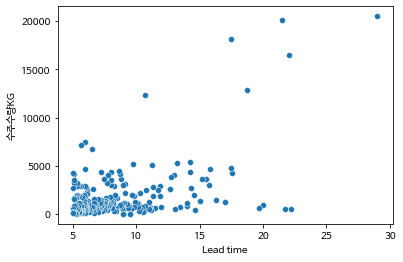

In [ ]:
ax=sns.scatterplot(x='Lead time',y='수주수량KG',data=kg)

In [ ]:
book_lead_month_group_d=book_lead_month.groupby('구분')['Lead time'].mean()
book_lead_month_group_d=pd.DataFrame(book_lead_month_group_d).reset_index()
book_lead_month_group_d.sort_values(by=['Lead time'],ascending=False,inplace=True)
book_lead_month_group_d

,구분,Lead time
0,drink,2.139456
4,soup,1.514043
3,sauce,1.445361
1,rice,1.421457
2,salad,1.410431


In [ ]:
book_lead_month_group_d_kg=book_lead_month.groupby('구분')['수주수량KG'].mean()
book_lead_month_group_d_kg=pd.DataFrame(book_lead_month_group_d_kg).reset_index()
book_lead_month_group_d_kg.sort_values(by=['수주수량KG'],ascending=False,inplace=True)
book_lead_month_group_d_kg

,구분,수주수량KG
3,sauce,200.542709
4,soup,143.930674
1,rice,138.508266
2,salad,138.246727
0,drink,25.312925


In [ ]:
book_lead_month_group_money=book_lead_month.groupby('수주품목코드')['수주단가'].mean()
book_lead_month_group_money=pd.DataFrame(book_lead_month_group_money).reset_index()
book_lead_month_group_money.sort_values(by=['수주단가'],ascending=False,inplace=True)
book_lead_month_group_money

,수주품목코드,수주단가
555,13R09039,40800.000000
423,13K01273,26989.790754
736,16B03015,18688.461538
466,13L00005,17950.729349
465,13L00001,14652.576184
...,...,...
517,13R04015,170.000000
433,13K01324,146.315789
786,16B06106,92.000000
565,13R10013,85.863388


# 모델링 -리드타임 예측 모델 개발

In [ ]:
book_lead

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015
1,A,2015-12-14,443,SI0298,16D01021,NaN,100,5400.00,540000.0,0,Y,2015-12-15,1.0,2015.0,2015
2,B4,2015-12-14,2,IJ9455,1S101004,NaN,922,5200.00,567273.0,56727,Y,2015-12-14,0.0,2015.0,2015
3,A,2015-12-14,451,SI0346,1BA04019,NaN,40,310.00,45091.0,4509,Y,2015-12-15,1.0,2015.0,2015
4,A,2015-12-14,452,SI0346,1BA04001,NaN,18,1550.00,22546.0,2254,Y,2015-12-15,1.0,2015.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343245,A,2021-11-02,150,IJ9548,16B06095,NaN,256,7723.00,561673.0,56167,Y,2021-11-03,1.0,2021.0,2021
1343246,B4,2021-11-04,1,IA1406,13A00748,NaN,200,9800.00,1960000.0,196000,Y,2021-11-05,1.0,2021.0,2021
1343247,B4,2021-11-04,2,IA1406,18A03045,NaN,30,8400.00,252000.0,25200,Y,2021-11-05,1.0,2021.0,2021
1343248,C,2021-10-30,113,IJ9780,16A03015,NaN,1,4405.76,4406.0,0,Y,2021-10-31,1.0,2021.0,2021


In [ ]:
book_lead_merge_name

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명,구분
0,A,2015-12-14,441,SI0298,16A01039,NaN,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
1,C,2015-12-14,163,IJ9455,16A01039,NaN,525,2745.00,1441125.0,144113,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
2,A,2016-10-19,7,IJ1693,16A01039,NaN,30,3513.00,95810.0,9580,Y,2016-10-20,1.0,2016.0,2016,시아스고구마샐러드S,salad
3,C,2015-12-15,61,IJ9455,16A01039,NaN,170,2745.00,466650.0,46665,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
4,A,2015-12-15,144,IJ9449,16A01039,NaN,50,3520.00,160000.0,16000,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915158,C,2021-11-02,196,IJ9455,1BA03681,NaN,83,1050.00,288750.0,28875,Y,2021-11-02,0.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915159,A,2021-11-02,138,IJ9449,1BA03681,NaN,23,1390.00,94773.0,9477,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915160,A,2021-11-02,149,IJ9548,1BA03681,NaN,38,1485.00,168750.0,16875,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915161,C,2021-10-30,98,IJ9399,1BA10086,NaN,1,4766.39,4766.0,0,Y,2021-10-31,1.0,2021.0,2021,(1)Homeplus signature날치알이톡톡터지는날치알밥(밥+후리가,sauce


In [ ]:
book_lead_merge_name.isna().sum()

수주사업장             0
수주일자              0
수주일련번호            0
거래처코드             0
수주품목코드            0
출고수량KG       915162
수주수량KG            0
수주단가              0
수주금액              0
부가세금액             0
출하완료여부            0
납기일자             27
Lead time        27
Year1            27
Year2             0
품목명               0
구분             9260
dtype: int64

In [ ]:
book_lead_merge_name.columns

Index(['수주사업장', '수주일자', '수주일련번호', '거래처코드', '수주품목코드', '출고수량KG', '수주수량KG',
       '수주단가', '수주금액', '부가세금액', '출하완료여부', '납기일자', 'Lead time', 'Year1',
       'Year2', '품목명', '구분'],
      dtype='object')

In [ ]:
len(book_lead_merge_name.거래처코드.unique())

1099

In [ ]:
book_lead_merge_name_dropna=book_lead_merge_name.drop('출고수량KG',axis=1)
book_lead_merge_name_dropna=book_lead_merge_name_dropna.dropna(axis=0)
book_lead_merge_name_dropna

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time,Year1,Year2,품목명,구분
0,A,2015-12-14,441,SI0298,16A01039,5,3630.00,16500.0,1650,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
1,C,2015-12-14,163,IJ9455,16A01039,525,2745.00,1441125.0,144113,Y,2015-12-15,1.0,2015.0,2015,시아스고구마샐러드S,salad
2,A,2016-10-19,7,IJ1693,16A01039,30,3513.00,95810.0,9580,Y,2016-10-20,1.0,2016.0,2016,시아스고구마샐러드S,salad
3,C,2015-12-15,61,IJ9455,16A01039,170,2745.00,466650.0,46665,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
4,A,2015-12-15,144,IJ9449,16A01039,50,3520.00,160000.0,16000,Y,2015-12-16,1.0,2015.0,2015,시아스고구마샐러드S,salad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915158,C,2021-11-02,196,IJ9455,1BA03681,83,1050.00,288750.0,28875,Y,2021-11-02,0.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915159,A,2021-11-02,138,IJ9449,1BA03681,23,1390.00,94773.0,9477,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915160,A,2021-11-02,149,IJ9548,1BA03681,38,1485.00,168750.0,16875,Y,2021-11-03,1.0,2021.0,2021,(1)NEW새우볶음밥300g(칼로스쌀),sauce
915161,C,2021-10-30,98,IJ9399,1BA10086,1,4766.39,4766.0,0,Y,2021-10-31,1.0,2021.0,2021,(1)Homeplus signature날치알이톡톡터지는날치알밥(밥+후리가,sauce


# 범주형 변환+ 더미화


In [ ]:
## 전체데이터

df_train_dummy=book_lead_merge_name_dropna.drop(['수주일자','납기일자','품목명','수주품목코드','거래처코드','Lead time',
                                          'Year1'],axis=1) # 품목명은 지워봄
df_dummy_y=book_lead_merge_name_dropna['Lead time']

df_dummy_x=pd.get_dummies(df_train_dummy)

# #oversampling
# sm = SMOTE(random_state=1234)
# df_dummy_x, df_dummy_y = sm.fit_resample(df_dummy_x,df_dummy_y)
# 데이터 스케일링 (더미화 후)
scaler=StandardScaler()

df_scale_dummy=scaler.fit_transform(df_dummy_x)

df_dummy_x=pd.DataFrame(df_scale_dummy,columns=list(df_dummy_x.columns))

#데이터 분할(더미화 된 것)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_dummy_x, df_dummy_y, test_size=0.3,random_state=1234)

df_dummy_train=df_dummy_x.join(df_dummy_y)





In [ ]:
xgboost=XGBRegressor(n_estimator=200)

xgboost.fit(df_train_x,df_train_y)


[17:07:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimator=200)

In [ ]:
y_pred_xgb=xgboost.predict(df_test_x)


rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_xgb))
print("RMSE: %f" % (rmse))
print("r2 score:",r2_score(df_test_y, y_pred_xgb))


RMSE: 4.920006
r2 score: 0.04971106850666818


## feature importance

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
#feature importance

import shap

explainer = shap.TreeExplainer(xgboost)


In [ ]:
shap_values = explainer.shap_values(df_test_x)

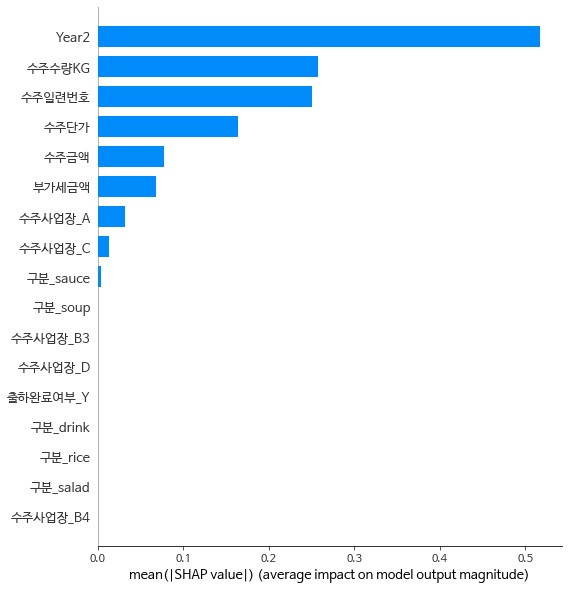

In [ ]:
shap.summary_plot(shap_values, df_test_x, plot_type="bar")

# 개 거지같이 나옴!


# 품목별 평균 리드타임으로 넣어서 데이터 프레임 만들고 그걸로 진행해보자!

## XGBOOST

In [ ]:
kg

,수주품목코드,Lead time,수주수량KG
0,16B06068,29.000000,20500.000000
1,1BA03025,22.200000,469.600000
2,16B06028,22.076923,16500.000000
3,1BA03026,21.750000,541.000000
4,16B06058,21.500000,20083.333333
...,...,...,...
219,13B00059,5.065574,86.688525
220,16B06043,5.056485,203.669456
221,13B00050,5.046980,220.644295
222,13R05025,5.028037,4238.046729


In [ ]:
book_lead_merge_name_dropna=book_lead_merge_name_dropna.merge(kg,on='수주품목코드',how='left')
book_lead_merge_name_dropna

,수주사업장,수주일자,수주일련번호,거래처코드,수주품목코드,수주수량KG_x,수주단가,수주금액,부가세금액,출하완료여부,납기일자,Lead time_x,Year1,Year2,품목명,구분,Lead time_y,수주수량KG_y,Lead time,수주수량KG
0,C,2015-12-14,284,IK0068,13L00015,3060,890.0,2723400.0,272340,Y,2015-12-16,2.0,2015.0,2015,네네토마토케첩153kg,sauce,7.230284,4351.343849,7.230284,4351.343849
1,C,2015-12-17,373,IJ1710,13L00015,5508,870.0,4791960.0,479196,Y,2015-12-23,6.0,2015.0,2015,네네토마토케첩153kg,sauce,7.230284,4351.343849,7.230284,4351.343849
2,C,2015-12-18,33,IJ1710,13L00015,3213,870.0,2795310.0,279531,Y,2015-12-24,6.0,2015.0,2015,네네토마토케첩153kg,sauce,7.230284,4351.343849,7.230284,4351.343849
3,C,2015-12-20,258,IJ1710,13L00015,4743,870.0,4126410.0,412641,Y,2015-12-22,2.0,2015.0,2015,네네토마토케첩153kg,sauce,7.230284,4351.343849,7.230284,4351.343849
4,C,2015-12-21,447,IJ1710,13L00015,3213,870.0,2795310.0,279531,Y,2015-12-25,4.0,2015.0,2015,네네토마토케첩153kg,sauce,7.230284,4351.343849,7.230284,4351.343849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16538,C,2021-10-27,24,IK2287,1BA03679,1800,4300.0,7740000.0,774000,Y,2021-11-02,6.0,2021.0,2021,(1)한그릇연근우엉밥(혼합미),sauce,9.800000,1910.400000,9.800000,1910.400000
16539,C,2021-10-27,377,IK2287,1BA03679,1200,4300.0,5160000.0,516000,Y,2021-10-28,1.0,2021.0,2021,(1)한그릇연근우엉밥(혼합미),sauce,9.800000,1910.400000,9.800000,1910.400000
16540,C,2021-10-28,31,IK2287,1BA03679,1200,4300.0,5160000.0,516000,Y,2021-11-09,12.0,2021.0,2021,(1)한그릇연근우엉밥(혼합미),sauce,9.800000,1910.400000,9.800000,1910.400000
16541,C,2021-10-28,32,IK2287,1BA03679,1800,4300.0,7740000.0,774000,Y,2021-11-15,18.0,2021.0,2021,(1)한그릇연근우엉밥(혼합미),sauce,9.800000,1910.400000,9.800000,1910.400000


In [ ]:

book_lead_merge_name_dropna.columns

Index(['수주사업장', '수주일자', '수주일련번호', '거래처코드', '수주품목코드', '수주수량KG_x', '수주단가',
       '수주금액', '부가세금액', '출하완료여부', '납기일자', 'Lead time_x', 'Year1', 'Year2',
       '품목명', '구분', 'Lead time_y', '수주수량KG_y', 'Lead time', '수주수량KG'],
      dtype='object')

In [ ]:
## 전체데이터

df_train_dummy=book_lead_merge_name_dropna.drop(['수주일자','거래처코드','수주품목코드','수주수량KG_x',
                                                 '납기일자','Lead time_x', 'Year1','품목명','Lead time_y', '수주수량KG_y','Lead time'],axis=1) # 품목명은 지워봄
df_dummy_y=book_lead_merge_name_dropna['Lead time']

df_dummy_x=pd.get_dummies(df_train_dummy)

# #oversampling
# sm = SMOTE(random_state=1234)
# df_dummy_x, df_dummy_y = sm.fit_resample(df_dummy_x,df_dummy_y)
# 데이터 스케일링 (더미화 후)
scaler=StandardScaler()

df_scale_dummy=scaler.fit_transform(df_dummy_x)

df_dummy_x=pd.DataFrame(df_scale_dummy,columns=list(df_dummy_x.columns))

#데이터 분할(더미화 된 것)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_dummy_x, df_dummy_y, test_size=0.3,random_state=1234)

df_dummy_train=df_dummy_x.join(df_dummy_y)





In [ ]:
xgboost=XGBRegressor(n_estimator=200,learning_rate=0.5)

xgboost.fit(df_train_x,df_train_y)


[17:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.5, n_estimator=200)

In [ ]:
y_pred_xgb=xgboost.predict(df_test_x)


rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_xgb))
print("RMSE: %f" % (rmse))
print("MAE: ",mean_absolute_error(df_test_y,y_pred_xgb))
print("MAPE: ",mean_absolute_percentage_error(df_test_y,y_pred_xgb))
print("r2 score:",r2_score(df_test_y, y_pred_xgb))


RMSE: 0.375603
MAE:  0.150991964306789
MAPE:  2.1162602490439615
r2 score: 0.9679802526976369


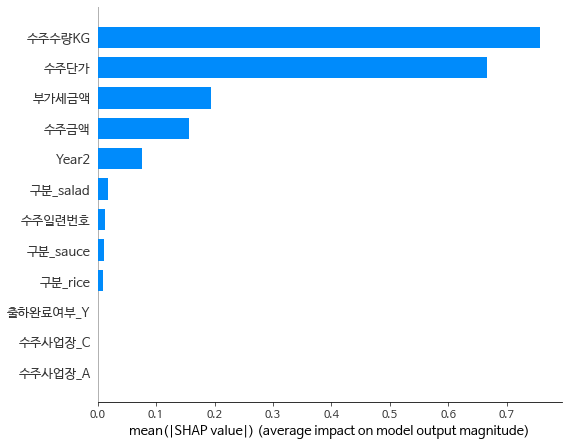

In [ ]:
#feature importance

explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(df_test_x)
shap.summary_plot(shap_values, df_test_x, plot_type="bar")

## 의사결정트리

In [ ]:
tree=DecisionTreeRegressor(max_depth=40,min_samples_leaf=8,
                                       
                                     min_samples_split=20,
                                    random_state=1234)

tree.fit(df_train_x,df_train_y)
y_pred_tree=tree.predict(df_test_x)

print("Score of train:",tree.score(df_train_x,df_train_y).round(3))
print("Score of test:",tree.score(df_test_x,df_test_y).round(3))


Score of train: 0.967
Score of test: 0.939


In [ ]:

rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_tree))
print("RMSE: %f" % (rmse))
print("MAE: ",mean_absolute_error(df_test_y,y_pred_tree))
print("MAPE: ",mean_absolute_percentage_error(df_test_y,y_pred_tree))
print("r2 score:",r2_score(df_test_y, y_pred_tree))


RMSE: 0.519786
MAE:  0.0856905177197618
MAPE:  0.9866478559987039
r2 score: 0.938678990856286


## feature importance - dt

Text(0, 0.5, '변수')

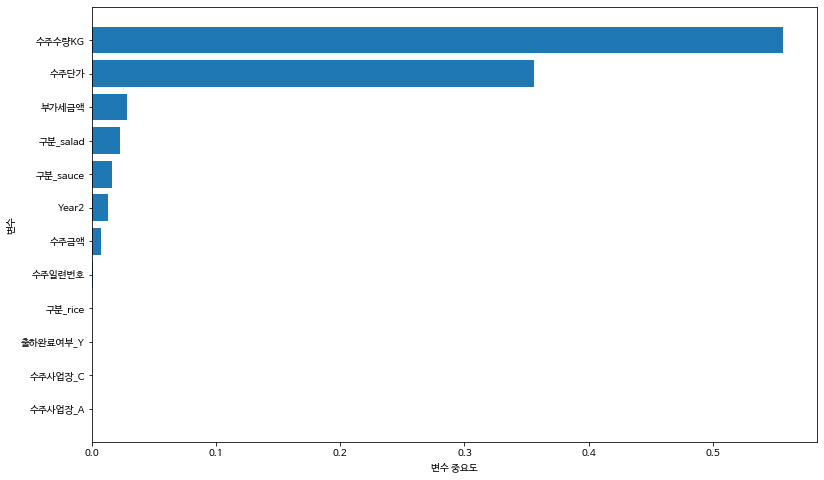

In [ ]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)

df_importance.sort_values("Importance",ascending=True,inplace=True)

coordinates=range(len(df_importance))

plt.figure(figsize=(13,8))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])

plt.xlabel("변수 중요도")
plt.ylabel("변수")


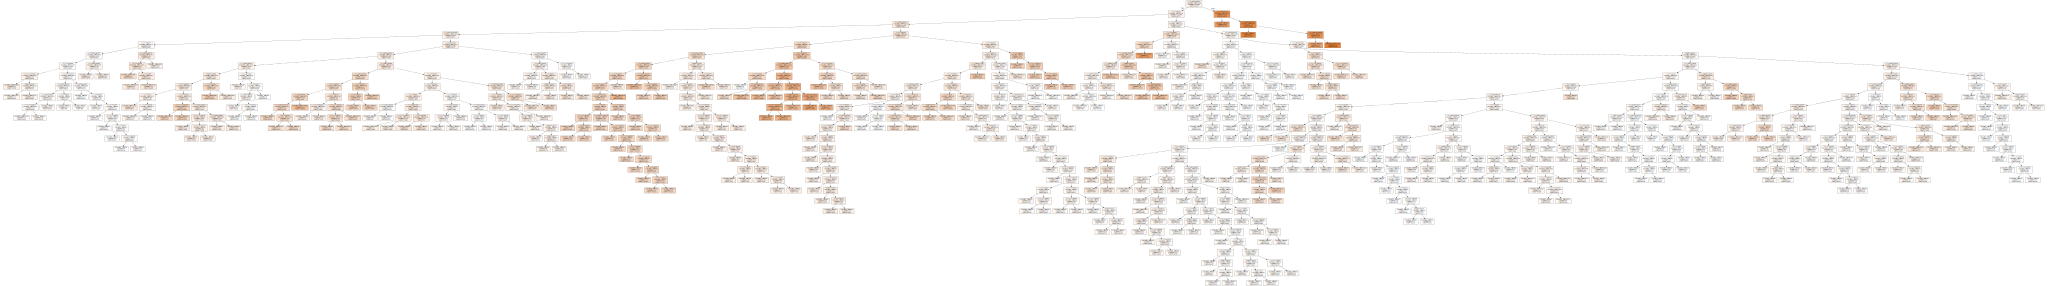

In [ ]:
#트리그려보기
import pydot
v_feature_name=df_train_x.columns

export_graphviz(tree,out_file="DT.dot",
               feature_names=v_feature_name,impurity=True,filled=True)

with open("DT.dot") as f:
    dot_graph=f.read()
    (graph,)=pydot.graph_from_dot_file("DT.dot",encoding="utf8")
    
display(graphviz.Source(dot_graph))
graph.write_png("dt.png")

## 랜덤포레스트

In [ ]:
# Random Forest 모델
rf_model=RandomForestRegressor(random_state=1234, n_estimators = 100, 
                               min_samples_leaf = 2,
                               min_samples_split = 10, 
                               max_depth = 9)
rf_model.fit(df_train_x, df_train_y)

y_pred_rf=tree.predict(df_test_x)
# Train 데이터 설명력
print("Score on training set:{:.3f}".format(rf_model.score(df_train_x,df_train_y).round(3)))

# Test 데이터 설명력
print("Score on test set:{:.3f}".format(rf_model.score(df_test_x,df_test_y).round(3)))


Score on training set:0.920
Score on test set:0.897


In [ ]:

rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_rf))
print("RMSE: %f" % (rmse))
print("MAE: ",mean_absolute_error(df_test_y,y_pred_rf))
print("MAPE: ",mean_absolute_percentage_error(df_test_y,y_pred_rf))
print("r2 score:",r2_score(df_test_y, y_pred_rf))


RMSE: 0.519786
MAE:  0.0856905177197618
MAPE:  0.9866478559987039
r2 score: 0.938678990856286


## feature importance- rf

Text(0, 0.5, '변수')

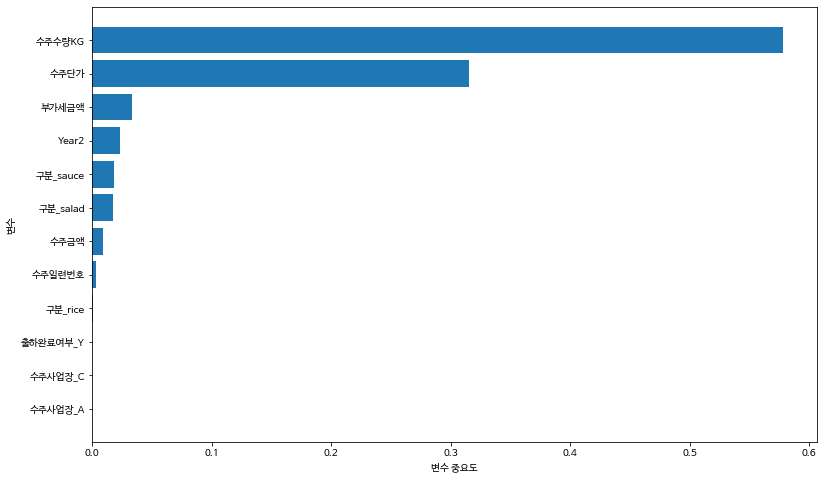

In [ ]:
## 변수중요도
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_model.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)

df_importance.sort_values("Importance",ascending=True,inplace=True)

coordinates=range(len(df_importance))

plt.figure(figsize=(13,8))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])

plt.xlabel("변수 중요도")
plt.ylabel("변수")


## 영향인자를 알아보기 위해 다중선형회귀 -->망함  
##전제조건을 만족하지 못하여 모델을 신뢰할 수 없다


In [ ]:
df_train=df_dummy_x.join(df_dummy_y)
df_train.columns

Index(['수주일련번호', '수주단가', '수주금액', '부가세금액', 'Year2', '수주수량KG', '수주사업장_A',
       '수주사업장_C', '출하완료여부_Y', '구분_rice', '구분_salad', '구분_sauce', 'Lead time'],
      dtype='object')

In [ ]:
df_train.columns=df_train.columns.str.replace(" ","")

In [ ]:

#표준화후 회귀계수
scaled_reg_model=smf.ols(formula="Leadtime ~ 수주일련번호+수주단가+수주금액+부가세금액+수주수량KG+수주사업장_A+수주사업장_C+출하완료여부_Y+구분_rice+구분_salad+구분_sauce",
                                    data=df_train)

scaled_reg_result=scaled_reg_model.fit()
print(scaled_reg_result.summary())
#Prob(Omnibus):       0.000 모델이 적합한지 의심된다.

                            OLS Regression Results                            
Dep. Variable:               Leadtime   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1038.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:06:45   Log-Likelihood:                -32826.
No. Observations:               16543   AIC:                         6.567e+04
Df Residuals:                   16534   BIC:                         6.574e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7613      0.014    493.970      0.0

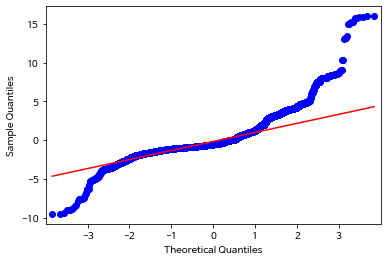

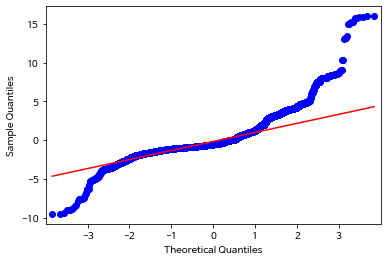

In [ ]:
#정규성 검증
#분포가 직선을 따르지 않음
qqplot(scaled_reg_result.resid,line='q')

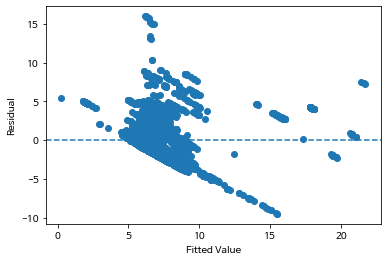

In [ ]:
#등분산성 검증

plt.scatter(scaled_reg_result.fittedvalues,scaled_reg_result.resid)

plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.axhline(y=0,linestyle='--')

# Random성이 떨어지는 것 같다.


## SVM --> 이건 grid search 해서 파라미터 알아냄

In [ ]:
svr = SVR(gamma = 1, C = 10)

svr.fit(df_train_x, df_train_y)

y_pred_svr = svr.predict(df_test_x)

rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_svr))
print("RMSE: %f" % (rmse))
print("MAE: ",mean_absolute_error(df_test_y,y_pred_svr))
print("MAPE: ",mean_absolute_percentage_error(df_test_y,y_pred_svr))
print("r2 score:",r2_score(df_test_y, y_pred_svr))

RMSE: 1.143017
MAE:  0.49808895453126734
MAPE:  6.789459718934326
r2 score: 0.7034719320872259


## KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5,weights='distance',
                          leaf_size=10
                                 )

knn.fit(df_train_x, df_train_y)
y_pred_knn = knn.predict(df_test_x)

In [ ]:
rmse = np.sqrt(mean_squared_error(df_test_y, y_pred_knn))
print("RMSE: %f" % (rmse))
print("MAE: ",mean_absolute_error(df_test_y,y_pred_knn))
print("MAPE: ",mean_absolute_percentage_error(df_test_y,y_pred_knn))
print("r2 score:",r2_score(df_test_y, y_pred_knn))

RMSE: 1.090268
MAE:  0.40362095700535966
MAPE:  5.384378986396554
r2 score: 0.7302092722632634


# 모델평가

In [ ]:
#분석 모델 
model = ["DecisionTree", "RandomForest", "XGBoost", "SVM","knn"] 

# 정확도 저장 
test_rmse= [] 
test_mae= [] 
test_mape= [] 
# r2 score 저장 
model_r2 = []


In [ ]:
##Decision Tree

#rmse

rmse = np.sqrt(mean_squared_error(df_test_y, tree.predict(df_test_x)))
test_rmse.append(rmse)

#mae
test_mae.append(mean_absolute_error(df_test_y,y_pred_tree))

#mape
test_mape.append(mean_absolute_percentage_error(df_test_y,y_pred_tree))

# r2score
model_r2.append(r2_score(df_test_y, y_pred_tree))

##"RandomForest", 

#rmse

rmse = np.sqrt(mean_squared_error(df_test_y, rf_model.predict(df_test_x)))
test_rmse.append(rmse)

#mae
test_mae.append(mean_absolute_error(df_test_y,y_pred_rf))

#mape
test_mape.append(mean_absolute_percentage_error(df_test_y,y_pred_rf))

# r2score
model_r2.append(r2_score(df_test_y, y_pred_rf))

#"XGBoost", 

#rmse

rmse = np.sqrt(mean_squared_error(df_test_y, xgboost.predict(df_test_x)))
test_rmse.append(rmse)

#mae
test_mae.append(mean_absolute_error(df_test_y,y_pred_xgb))

#mape
test_mape.append(mean_absolute_percentage_error(df_test_y,y_pred_xgb))

# r2score
model_r2.append(r2_score(df_test_y, y_pred_xgb))


#"SVM",


#rmse

rmse = np.sqrt(mean_squared_error(df_test_y, svr.predict(df_test_x)))
test_rmse.append(rmse)

#mae
test_mae.append(mean_absolute_error(df_test_y,y_pred_svr))

#mape
test_mape.append(mean_absolute_percentage_error(df_test_y,y_pred_svr))

# r2score
model_r2.append(r2_score(df_test_y, y_pred_svr))


#"knn"

#rmse

rmse = np.sqrt(mean_squared_error(df_test_y, knn.predict(df_test_x)))
test_rmse.append(rmse)

#mae
test_mae.append(mean_absolute_error(df_test_y,y_pred_knn))

#mape
test_mape.append(mean_absolute_percentage_error(df_test_y,y_pred_knn))

# r2score
model_r2.append(r2_score(df_test_y, y_pred_knn))


In [ ]:
#모델별 평가 결과
df_eval = pd.DataFrame(index=model)
df_eval["TEST_RMSE"] = test_rmse
df_eval["TEST_MAE"] = test_mae
df_eval["TEST_MAPE"] = test_mape
df_eval["R2_score"] = model_r2
df_eval.round(3)

,TEST_RMSE,TEST_MAE,TEST_MAPE,R2_score
DecisionTree,0.520,0.086,0.987,0.939
RandomForest,0.674,0.086,0.987,0.939
XGBoost,0.376,0.151,2.116,0.968
SVM,1.143,0.498,6.789,0.703
knn,1.090,0.404,5.384,0.730
